# Analyzing Response Function of Market Impact at Microstructure Level
#### It is well known that a transaction can generate market impact on the price of a traded instrument. Here, we consider the case of commodity futures trading and a delicate impact process at a tick-by-tick level.

#### Kernel Functions 
Assume that trading of a commodity futures contract commenced at a time
point that is far away from the current time point: 𝑡 > 0. Further assume that at exactly the
same time point 𝑡, a transaction happened with a price of $𝑝_t > 0$, size of $𝑉_t > 0$, and a sign
of $𝜖_𝑡$ which is +1, -1 or 0. +1 indicates that the trade is buyer-initiated, -1 indicates seller-initiated, and 0 indicates no specific direction can be determined.
To understand how all the trades that happened before the trade at time point 𝑡 (or the “current trade”) influenced the market to attain a trade price of $𝑝_𝑡$, we consider the following assumptions:
-  First, we assume that all the trades that happened before the trade at time point 𝑡 should have impact on the current trade, even though we are quite certain that the most recent ones should have higher, more direct impact on the current trade than “older” trades that happened at time points 𝑡′ with 𝑡′ ≪ 𝑡
- Secondly, we assume that for a trade that happened at 𝑡′, the direction of its impact on the prices of future trades after it will be the same as the direction of this trade, 𝜖𝑡′; that is, if the trade at 𝑡′ is buyer-initiated, then it exerts upward pressure on prices of all trades that are after it; ditto if the trade at 𝑡′ is seller-initiated except that the price pressure is downward
- Thirdly, we assume that the magnitude of the impact of trade at 𝑡′ on future trades will be in proportion to the size of this trade, but in a non-linear fashion.

With the above assumptions, we contemplate that the trade price at time point 𝑡 will be a combination of an independent innovation term and the impacts of all trades that happened before 𝑡, with older trades that have more decayed impact than new ones. Mathematically, we can express the trade price, $𝑝_𝑡$, as in equation (1). 𝐺(𝑡) is called a kernel function that is instrument-specific, but not trade-specific. A typical kernel function increase with argument 𝑡 while it is small,then decays to 0 when 𝑡→+∞. A kernel function reflects the dynamics of order books, including limit order insertion, limit order deletion and market order interaction with order books. Parameter α in equation (1) is positive and less than 1, which has been observed frequently in markets across different kinds of assets. 
$$p_t=\sum_{t'<t}[G(t-t')V_{t'}^\alpha\epsilon_{t'}]+𝜀_t\quad(1)$$
In addition, we often assume that the innovation term $𝜀_𝑡$ for −∞ < 𝑡 < +∞ in equation (1) follows an independent random process from the impact process that we focus on. 𝜀𝑡 is often driven by stock-specific processes such as news, etc.

#### Response Functions
A response function is defined as follows:
$$𝑅_𝑙 = ⟨(𝑝_{𝑡+𝑙} − 𝑝_𝑡)𝜖_𝑡⟩_{\text{𝑜𝑣𝑒𝑟 𝑡}}\quad(2)$$
The ⟨.⟩ indicates “ensemble average” of trade 𝑡's market impact on trade 𝑡 + 𝑙 for all 𝑡's
in the sample. If we call the trade that happened at time 𝑡 an “anchoring” trade, then the response function in equation (2) gives the price change over a fixed time difference (or, lag) of 𝑙, conditioned on the direction of the anchoring trade, then averaged over all anchoring trades. In this assignment, lag 𝑙 indicates the difference of indexes of the two trades in our data file, instead of time difference. Therefore, the market impact model that we will be building is an “event-driven” model that is based on individual trade events.
In practice, not only that the time lapse from one trade event to the next one is not always fixed, but also that one may not be able to gather all individual trade events. For instruments that one can only get “sub-samples” of market data (such as one snapshot every a few hundred milliseconds or a few seconds), (2) is often re-written as
$$\tilde{R}_l = ⟨(\hat{p}_{t+l}-m_t)\epsilon_t⟩_{\text{over t}}\quad (3)$$

where 𝑚𝑡 is the mid-quote of the snapshot at time 𝑡, and $𝑝̂_𝑡$ is the VWAP of all the individual trades that happened between 𝑡 and 𝑡 + ∆𝑡 , two adjacent snapshots with ∆𝑡~250 milliseconds for commodity futures that we consider in this assignment. $𝑝̂_{𝑡+𝑙}$’s are subsequent VWAP prices for trades the fall between 𝑡 + 𝑙∆𝑡 and 𝑡 + (𝑙 + 1)∆𝑡 for 𝑙 = 1,2, ... In this set-up, 𝑚𝑡 is also called the “prevailing mid-quote” for $𝑝̂_𝑡$ because it appears right before the trades between 𝑡 and 𝑡+∆𝑡.
  
With its definition in equation (3). It shows that 𝑅𝑙 (𝑙 = 0, 1, 2, ... ) is often statistically significantly positive for relatively small 𝑙 (such as 𝑙 ≲ 200) and can extend to as large as 𝑙 ∼ 1000, which is a clear sign of market impact: for trades with $𝜖_𝑡 = +1$, a positive response function indicates that, on average, $𝑝̂_{𝑡+𝑙}$ in equation (3) is higher than 𝑚𝑡; for trades with $𝜖_𝑡 = −1$, a positive response function indicates that, on average, $𝑝̂_{𝑡+𝑙}$ in equation (3) is lower than $𝑚_𝑡$. In both cases, the trade at 𝑡 has “directional” impact on subsequent trade prices. Note that, because we assume that the innovation term $𝜀_𝑡$ for −∞ < 𝑡 < +∞ follows an independent random process, it does not affect the response function. In this assignment, we also divide the right-hand side of equation (3) by the bid-ask spread of the prevailing quote at 𝑡 to smooth out the effect of fluctuating bid-ask spread.

#### Sign and Size Auto-correlation
Let’s define
$$𝐶(𝑙)≡⟨𝜖_t 𝜖_{t+l} 𝑉^𝛼_{t+l}⟩\quad(4)$$
over all of 𝑡’s. For financial instruments that have relatively constant trade sizes, we often further simplify matters and include trade size in equation (4) as follows:
$$𝐶(𝑙)~\bar{𝑉^\alpha} ⟨𝜖_𝑡+𝜖_{𝑡+𝑙}⟩ \text{ or } 𝐶(𝑙)~\bar{𝑉^\alpha} 𝑐(𝑙) \text{ where } 𝑐(𝑙) ≡ ⟨𝜖_𝑡 𝜖_{𝑡+𝑙}⟩\quad (5)$$
where 𝑉 indicates an average trade size. One of the rationales behind equation (5) is that,
when 𝛼 < 1, marginal increase in trade size has relatively subdued influence on the response function calculations in (2) and (3).
It is often found from empirical studies that, for commodity futures contracts that we focus on in this project, ⟨𝜖_𝑡 𝜖_{𝑡+𝑙}⟩ follows a power law as follows: ⟨𝜖_𝑡 𝜖_{𝑡+𝑙}⟩ ∼ |𝑙|−𝛾 for 0 < γ < 1. 

In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.pyplot as plt

# Replace 'first_file.csv' and 'second_file.csv' with the actual paths to your CSV files
file_path1 = '/Users/jiahongcai/Desktop/2023 Fall/FINM/07.csv'
file_path2 = '/Users/jiahongcai/Desktop/2023 Fall/FINM/08.csv'

# Read the first CSV file into a DataFrame
df1 = pd.read_csv(file_path1)

# Read the second CSV file into a DataFrame
df2 = pd.read_csv(file_path2)

# Append the second DataFrame to the bottom of the first one
df = pd.concat([df1,df2],axis=0)
# Display the combined DataFrame
print(df)

        Unnamed: 0      Date       Time   Size         VWAP  Sign    midQ  \
0                0  20160701   90100020   48.0  5267.916667  -1.0  5268.0   
1                1  20160701   90100270   42.0  5266.571429  -1.0  5268.0   
2                2  20160701   90100518   72.0  5268.444444   1.0  5267.0   
3                3  20160701   90100762  326.0  5270.000000   1.0  5268.0   
4                4  20160701   90101019    6.0  5268.666667  -1.0  5270.0   
...            ...       ...        ...    ...          ...   ...     ...   
506306       46010  20160831  145858815   44.0  5346.000000  -1.0  5347.0   
506307       46011  20160831  145859065   38.0  5347.263158   1.0  5347.0   
506308       46012  20160831  145859324    4.0  5346.000000  -1.0  5347.0   
506309       46013  20160831  145859572    4.0  5347.000000   0.0  5347.0   
506310       46014  20160831  145859792    NaN          NaN   NaN  5347.0   

           BP1     SP1  
0       5266.0  5270.0  
1       5266.0  5270.0  


### With the data provided construct $𝑅_𝑙$ for 0 ≤ 𝑙 ≤ 500 as defined in equation (3) using all the available trades provided.



In [2]:
# Compute the R tilde value for each lag
def R_tilde_l(df, l=1) -> float:
    R_tmp = ((df['VWAP'].shift(-l) - df['midQ']) * df['Sign'] / (df['SP1'] - df['BP1'])).dropna() 
    return np.nanmean(R_tmp)

In [3]:
# Iterate for the entire data frame
R_tilde_values = [R_tilde_l(df, l) for l in range(1, 501)]
R_tilde_df = pd.Series(R_tilde_values, index=range(1, 501))

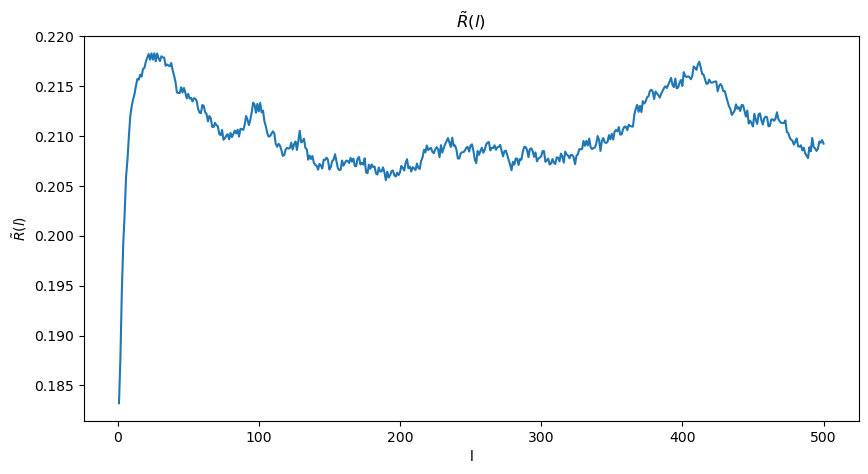

In [4]:
R_tilde_df.plot(figsize=(10,5)) 
plt.title(r'$\tilde{R}(l)$')
plt.xlabel('l')
plt.ylabel(r'$\tilde{R}(l)$')
plt.show()

With the data provided with this assignment, construct $\tilde{𝑅}_𝑙|𝑉$ for 0 ≤ 𝑙 ≤ 500 as defined in equation (3) for trades in different groups of trade sizes. That is, if we label all trades that have sizes that $𝑣_i < 𝑉_i ≤ 𝑣_{i+1}$ as group 𝑖, calculate $\tilde{𝑅}_l|v_𝑖<V_𝑖<v_{𝑖+1}$ for 0 ≤ 𝑙 ≤ 500 as defined in equation (3) for all the anchoring trades within group 𝑖. Note that any trade can be an anchoring trade, except the last few ones in a time series depending on the value of 𝑙. We define: $𝑣_1 = 0, 𝑣_2 =
2,𝑣_3 = 5,𝑣_4 = 10,𝑣_5 = 15,𝑣_6 = 20,𝑣_7 = 30,𝑣_8 = 40,𝑣_9 = 55,𝑣_10 = 90,𝑣_11 = 100000$.

Comment on your findings from this analysis, especially on how the response function depends on trade sizes.
- We can find that the bigger the trade size, the larger the response function. This is because when the market is more active and frequently trading, the prices are more volatile. And for most gouops, the response effect is first increasing then decreasing as the lag increases. The larger the trading size, the faster the response effect increases at the start.

In [5]:
# Group the trading data based on sizes
def R_tilde_l_groups(df,l = 1,v = [0, 2, 5, 10, 15, 20, 30, 40, 55, 90, 100000]):
    df = df.copy()
    df['Group'] = pd.cut(df['Size'], bins=v, labels=[f'v{i}-{i+1}' for i in range(len(v)-1)])
    df['R_tmp'] = ((df['VWAP'].shift(-l) - df['midQ']) * df['Sign']/ (df['SP1'] - df['BP1']) )
    df.dropna(inplace=True) 
    res = df.groupby('Group',observed = False)['R_tmp'].mean()
    return res

# Calculate the response value of all groups
response_functions_groups = {}
for l in range(1,501):
    response_functions_groups[l] = R_tilde_l_groups(df, l)
R_tilde_groups_df = pd.DataFrame(response_functions_groups).sort_index(axis=0)




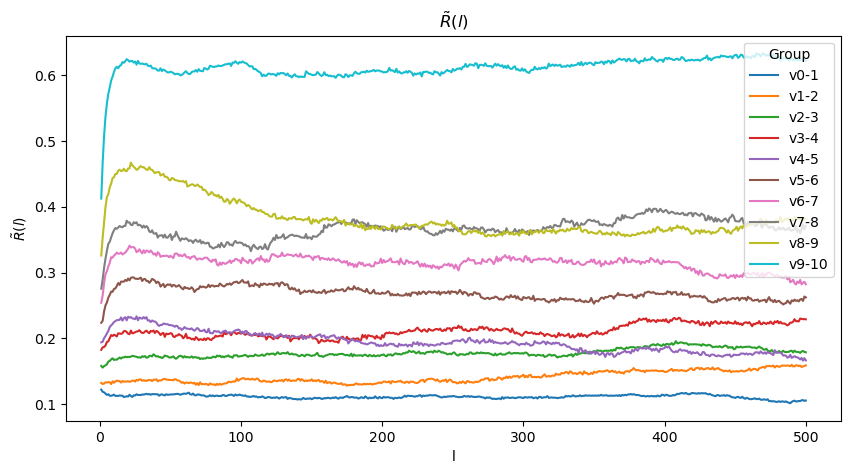

In [6]:
R_tilde_groups_df.T.plot(figsize=(10,5))
plt.title(r'$\tilde{R}(l)$')
plt.xlabel('l')
plt.ylabel(r'$\tilde{R}(l)$')
plt.show()

For 𝑙=10,20,30,40,50,75,100,125,150,175,200,250, plot $log(\tilde{𝑅}_𝑙|v_𝑖<V_𝑖<v_{𝑖+1})$ as a function of $log (〈𝑉_i)$ and fit the data into a straight line. Compare the slopes of different straight lines for different 𝑙. $〈𝑉_i〉$ is the average of trade sizes of all 𝑖 trades in group 𝑖.


In [7]:
# Calculate the means for each group sorted on sizes
def V_groups(df,v = [0, 2, 5, 10, 15, 20, 30, 40, 55, 90, 100000]):
    df = df.copy()
    df['Group'] = pd.cut(df['Size'], bins=v, labels=[f'v{i}-{i+1}' for i in range(len(v)-1)])
    df.dropna(inplace=True) 
    res = df.groupby('Group',observed = False)['Size'].mean()
    return res

# Deriving the log values
volume_groups = V_groups(df)
log_vol = np.log(volume_groups)

In [8]:
# Put them into the dataframe with log R values
ls = [10, 20, 30, 40, 50,75,100,125,150,175,200,250]
log_R = R_tilde_groups_df.loc[:,ls].apply(np.log)
log_R   

,10,20,30,40,50,75,100,125,150,175,200,250
Group,,,,,,,,,,,,
v0-1,-2.168222,-2.192574,-2.165422,-2.163041,-2.164750,-2.191911,-2.175030,-2.201509,-2.229634,-2.185464,-2.215537,-2.185941
v1-2,-2.021387,-2.002681,-1.999068,-1.982172,-1.989725,-2.032745,-1.979125,-2.002172,-1.981985,-2.055073,-2.017447,-2.015109
v2-3,-1.788637,-1.760656,-1.755172,-1.758371,-1.765827,-1.775021,-1.753807,-1.732583,-1.753207,-1.742917,-1.743528,-1.726361
v3-4,-1.582190,-1.574810,-1.569212,-1.554677,-1.570830,-1.622764,-1.574781,-1.606861,-1.598661,-1.597709,-1.584643,-1.533668
v4-5,-1.492316,-1.457204,-1.470055,-1.495493,-1.512566,-1.563025,-1.569406,-1.595616,-1.594312,-1.620338,-1.668107,-1.631516
v5-6,-1.290730,-1.235018,-1.247576,-1.258950,-1.265738,-1.283469,-1.248961,-1.260179,-1.309410,-1.291613,-1.310231,-1.306666
v6-7,-1.120986,-1.090427,-1.111027,-1.122167,-1.122395,-1.130957,-1.157665,-1.122403,-1.131639,-1.147583,-1.156616,-1.170102
v7-8,-1.010268,-0.978001,-0.998931,-1.021618,-1.026361,-1.066856,-1.063425,-1.029588,-1.047831,-0.980038,-1.001117,-1.014407
v8-9,-0.809812,-0.780390,-0.776778,-0.793194,-0.820406,-0.857358,-0.897498,-0.961693,-0.983498,-0.983270,-0.995276,-0.994466


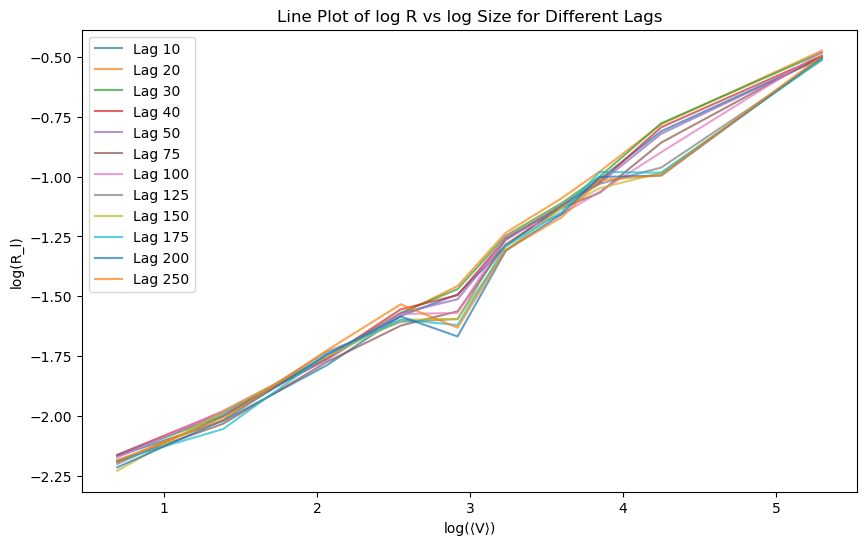

In [9]:


# Assuming ls is your list of lag values
ls = [10, 20, 30, 40, 50, 75, 100, 125, 150, 175, 200, 250]

plt.figure(figsize=(10, 6))

for lag in ls:
    plt.plot(log_vol, log_R[lag], label=f'Lag {lag}', alpha=0.7)

plt.xlabel('log(⟨V⟩)')
plt.ylabel('log(R_l)')
plt.legend()
plt.title('Line Plot of log R vs log Size for Different Lags')
plt.show()



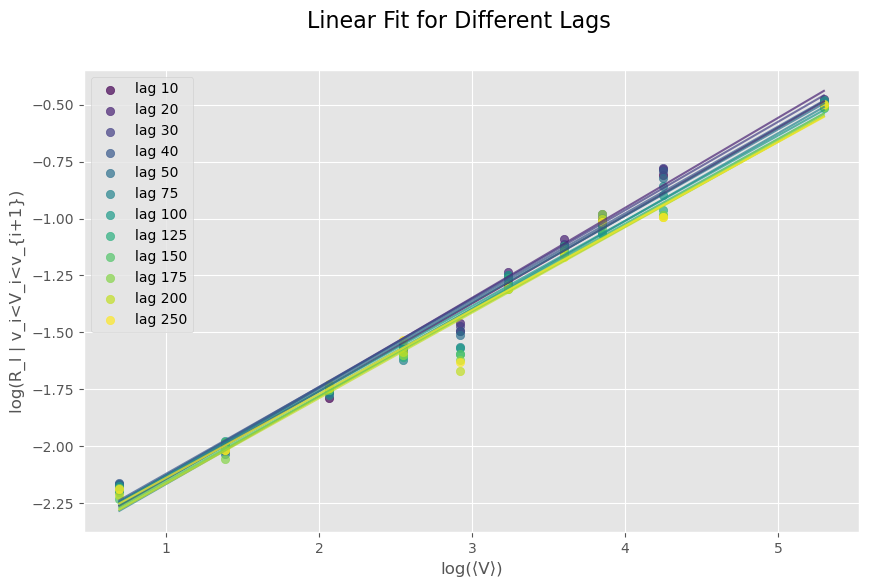

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')  # use ggplot style for this plot

slopes = {}

def log_plot(ax, x_values, y_values, l, color):
    slope, intercept = np.polyfit(x_values, y_values, 1)
    slopes[l] = slope

    ax.scatter(x_values, y_values, label=f'lag {l}', color=color, alpha=0.7)
    ax.plot(x_values, slope * x_values + intercept, color=color, alpha=0.7)
    ax.set_xlabel('log(⟨V⟩)')
    ax.set_ylabel('log(R_l | v_i<V_i<v_{i+1})')
    ax.legend(loc='upper left')

# ls is the list of lag values
ls = [10, 20, 30, 40, 50, 75, 100, 125, 150, 175, 200, 250]

m = 1  # number of columns
n = 1  # number of rows

fig, ax = plt.subplots(n, m, figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(ls)))

for i, l in enumerate(ls):
    color = colors[i]
    log_plot(ax, log_vol, log_R.loc[:, l], l, color)

fig.suptitle('Linear Fit for Different Lags', fontsize=16)
plt.show()


#### Comments
The slopes are almost the same for different lags values. The slopes for different lags are all around 0.38. 
It indicates the response function is a power law of volume size regardless of time lags.

Extract kernel function 𝐺(𝑡) in a numerical form of $𝐺_𝑙$ for 𝑙 = 1,2,3,...,500.
We could use the mean of the different slopes as an average alpha for V^alpha for proxy.

In [11]:
slopes_df = pd.DataFrame(slopes, index=['Slope']).T
alpha = slopes_df.mean().values[0]
alpha

0.379579815661316

In [12]:
def G_l(df, tot_l=500, alpha = 0.38) -> pd.Series:
    volume_mean_alpha = df['Size'].mean() ** alpha

    response_values = np.array([R_tilde_l(df, i) for i in range(1, tot_l+1)]) / volume_mean_alpha
    autocorr_values = np.array([np.nanmean(df['Sign'] * df['Sign'].shift(-i)) for i in range(tot_l+1)])

    t_vals = np.arange(tot_l)
    coeff_matrix = autocorr_values[np.abs(t_vals[:, None] - t_vals[None, :])] - autocorr_values[t_vals[None, :] + 1]

    G_values = np.linalg.solve(coeff_matrix, response_values)

    return pd.Series(G_values, index=range(1, tot_l+1))

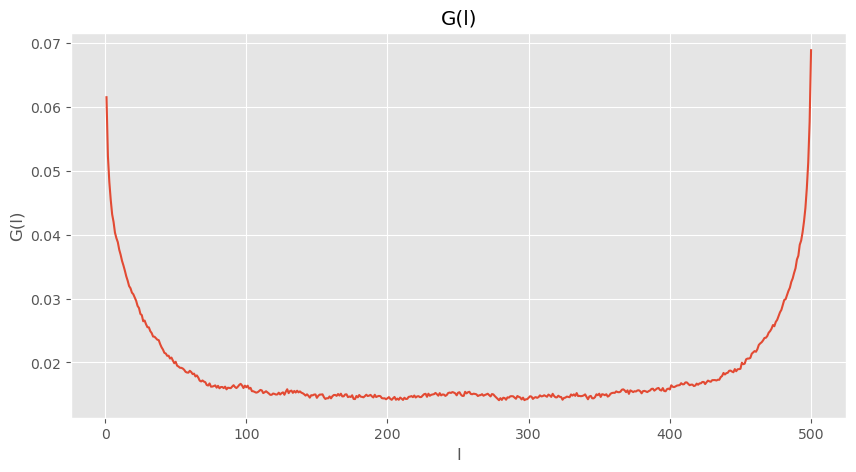

In [81]:
df_G = G_l(df, tot_l=500, alpha = alpha)

df_G.plot(figsize=(10,5))
plt.title('G(l)')
plt.xlabel('l')
plt.ylabel('G(l)')
plt.show()